# Evaluating a Machine Learning Model using an ROC Curve


Once your machine learning model has undergone training, a crucial evaluative tool comes into play—the ROC (Receiver Operating Characteristic) curve. This visualization holds immense significance within the realm of classification models, providing a comprehensive perspective on the intricate balance between sensitivity and specificity, adaptable across various threshold settings.

Embedded within the ROC curve lies the AUC (Area Under the Curve), a pivotal metric that quantifies the overall discriminatory power of your model. This area signifies the probability that the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance.

As you traverse the ROC curve, essential metrics like the true positive rate (TPR) and false positive rate (FPR) come to the forefront, both intricately tied to the threshold chosen. The interplay between these variables offers a nuanced insight into the model's performance characteristics across the entire spectrum of classification thresholds.

It's worth noting that the ROC curve's applicability shines particularly in scenarios where the classification model yields class probabilities. This capacity to visualize and analyze the model's behavior across thresholds not only aids in gauging its efficacy but also empowers tailored decision-making for diverse application contexts. By harnessing the insights gleaned from the ROC curve and its associated metrics, you can make informed choices to enhance your model's classification accuracy and utility.

Let's quickly walk through how to come up with ROC Curves. 



### Step 1: Import the neccesary packages 
The first step of this analysis involves importing essential packages to facilitate the subsequent tasks. The `NumPy` and `Pandas` libraries are brought in to handle data manipulation and analysis efficiently. The `CSV` package is imported for working with `.CSV` files, while the `random` module aids in generating random values or selections.

For visualization, the `Matplotlib` library is utilized, enabling the creation of various plots, including ROC curves. The `sklearn.` module's functions like `roc_curve`, `plot_roc_curve`, and `auc` are crucial for evaluating classification model performance and generating Receiver Operating Characteristic (ROC) curves. Lastly, the `%config InlineBackend.figure_format = 'retina'` line enhances the display quality of inline plots.

In essence, this initial step lays the foundation by importing the necessary tools to manipulate, analyze, and visualize data, essential for subsequent analysis and model assessment.

In [1]:
# Load packages
import numpy as np 
import pandas as pd 
import csv
import random
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%config InlineBackend.figure_format = 'retina'

### Step 2: Generating Synthetic Data for ROC Curve Analysis.
In Step 2 of the illustration we use a Python script generates a dataset containing random values for the purpose of constructing a Receiver Operating Characteristic (ROC) curve. This dataset is stored in a CSV file with two columns:

1. probability: This column represents the predicted probabilities of an event occurring, as projected by a machine learning model. These probabilities lie within the range of 0 to 1 and signify the likelihood of the event happening. Each row in this column may contain values like 0.95, 0.03, 0.87, etc., representing the varying degrees of confidence in event predictions.

2. actual_label: The second column holds the actual labels corresponding to the true identity of the target variable. These labels are binary, denoted as 1 or 0, signifying the occurrence or absence of the event, respectively. Each entry in this column can take values like 1 or 0, reflecting the actual outcomes of the events.

The Python script initiates by importing the necessary packages, including csv and random, to facilitate data generation and file writing. Within a loop that iterates 5000 times, random values are generated for both the probability and actual_label columns. For the probability column, random floating-point values between 0 and 1 are generated using `random.uniform(0, 1)` and rounded to two decimal places.

For the actual_label column, a random choice is made between 0 and 1 using `random.choice([0, 1])`. This process simulates the randomness of binary classification outcomes.

The generated data is then structured into a list of tuples, with each tuple containing a probability value and its corresponding actual_label. This list forms the basis of the dataset to be written into the CSV file.

The script specifies the path where the CSV file will be saved and uses the csv.writer to create and write the data into the file. A header row ("probability", "actual_label") is included, followed by each row of data.

Upon successful execution, the script prints a confirmation message indicating the successful generation of the CSV file containing the random data.

In essence, this step serves to simulate the outcomes of a machine learning model's predictions and their corresponding actual labels, generating a dataset that can be used to create an ROC curve for model evaluation.

In [2]:
# Generate random data for probability and actual_label columns
data = []
for _ in range(5000):
    probability = round(random.uniform(0, 1), 2)
    actual_label = random.choice([0, 1])
    data.append((probability, actual_label))

# Define CSV file path
csv_file_path = r"C:\Users\NDU-PC\Desktop\random_data.csv"

# Write data to CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["probability", "actual_label"])
    for row in data:
        writer.writerow(row)

print(f"CSV file '{csv_file_path}' generated successfully!")

CSV file 'C:\Users\NDU-PC\Desktop\random_data.csv' generated successfully!


### Step 3: Loading the Synthetic Data from CSV into a Data Frame.
Step 3 involves uploading your just generated data stored in a CSV format and loading it into a data frame using the Pandas library. This process enables you to access and manipulate the data efficiently for subsequent analysis.

To start, the code utilizes the Pandas library's read_csv function to read the CSV file located at the specified path, such as `"C:\Users\Desktop\random_data.csv"`. The function interprets the CSV data and transforms it into a data frame, which is a tabular structure resembling a spreadsheet.

By loading the data into a data frame, you gain the ability to perform various data operations, such as filtering, aggregation, and visualization. The `.head(10)` method then displays the first ten rows of the data frame, offering a glimpse of the data's structure and content.

In summary, Step 3 facilitates the transition from external data storage to a manipulable data frame format, serving as a foundational step for subsequent data exploration and analysis.

In [3]:
# Upload your data as CSV and load as data frame
df = pd.read_csv(r"C:\Users\NDU-PC\Desktop\random_data.csv")
df.head(10)

,probability,actual_label
0,0.34,0
1,0.18,1
2,0.16,1
3,0.21,0
4,0.45,0
5,0.58,0
6,0.59,1
7,0.28,0
8,0.23,1
9,0.59,1


probability: the predicted output of the model.  
actual_label: the actual label of the test record.  

### Step 4: Visualizing Data Distribution and Overlapping in Scatter Plot.
In this step, we create a scatter plot that helps us understand the relationship between the 'probability' values and the 'actual_label' outcomes. This plot is based on a randomly selected group of 100 data points.

Looking at the scatter plot, we see something important: it's not easy to draw a single line that separates the data perfectly. This is because some data points with different 'probability' values overlap each other, making it hard to separate them with a straight line. This observation tells us that finding the right threshold for classifying these data points isn't straightforward.

The scatter plot has 'probability' values on one side and 'actual_label' outcomes on the other. It shows us that the data is more complex than a simple separation line can handle. This complexity means that choosing the best way to classify the data accurately might require using more advanced techniques that consider these overlapping areas.

In short, Step 4 uses the scatter plot to demonstrate that due to data overlap, finding a clear threshold for classification isn't simple. This insight is crucial for developing smarter methods to classify the data effectively.

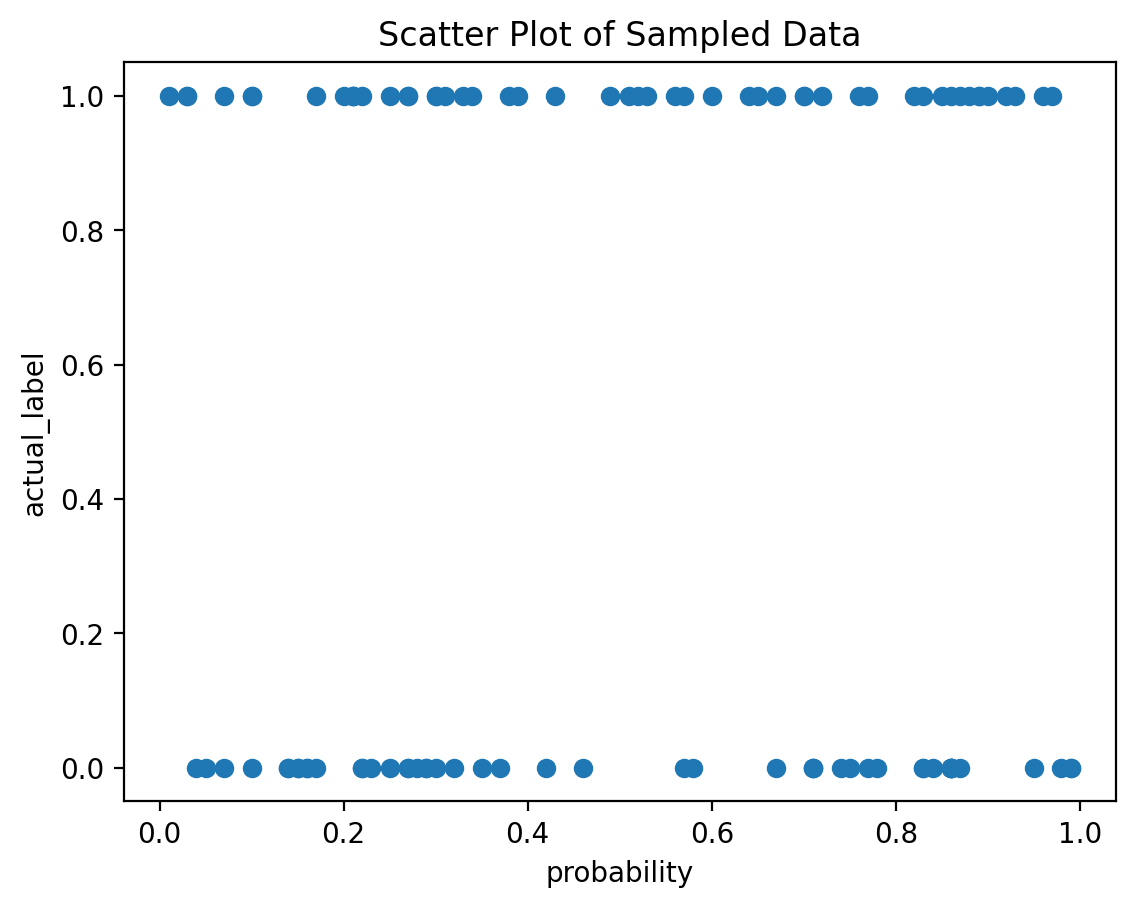

In [4]:
# Randomly sample 100 data points
sampled_data = df.sample(n=100, random_state=42)  # Adjust random_state as needed

# Create a scatter plot
plt.scatter(sampled_data['probability'], sampled_data['actual_label'])
plt.ylabel('actual_label')
plt.xlabel('probability')
plt.title('Scatter Plot of Sampled Data')
plt.show()


Now, we will plot the ROC curve using the scikit-learn's function `roc_curve`.

### Step 5: Constructing and Analyzing the ROC Curve.

In this step of the illustration, we delve into the process of evaluating the performance of our classification model by constructing and interpreting a Receiver Operating Characteristic (ROC) curve. This comprehensive analysis involves the following key actions:

1. Extracting Model Outputs: Initially, we extract the 'probability' values, which represent the predictions generated by our machine learning model, from the dataset. Similarly, the actual labels, termed 'actual_label,' are extracted to serve as a benchmark for comparison.

2. Computing ROC Metrics: By utilizing the `roc_curve` function from scikit-learn, we calculate crucial metrics for the ROC curve: the False Positive Rates (FPRs), True Positive Rates (TPRs), and corresponding thresholds. These metrics offer insights into the model's performance at different classification thresholds.

3. Calculating AUROC: The Area Under the ROC Curve (AUROC) is calculated using the `auc` function. This metric quantifies the overall discriminative ability of the model, taking into account its true positive and false positive rates across all possible thresholds.

4. Visualizing the ROC Curve: The code then proceeds to plot the ROC curve itself. The plot showcases the trade-off between true positive rate (TPR) and false positive rate (FPR) as the threshold for classification varies. A red dashed line is included as a baseline, representing the performance of random guessing. The blue curve illustrates the model's performance. The plot's axes are labeled, and the visualization offers a clear understanding of the model's classification ability.

5. Displaying AUROC Value: Lastly, the code displays the calculated AUROC value, offering a concise summary of the model's overall performance in a single numeric metric.

In summary, Step 5 is dedicated to evaluating the classification model's effectiveness by constructing an ROC curve. This visual representation, accompanied by AUROC calculation, aids in comprehending the model's true positive and false positive trade-offs across different thresholds, enabling informed decisions about model performance and potential enhancements.

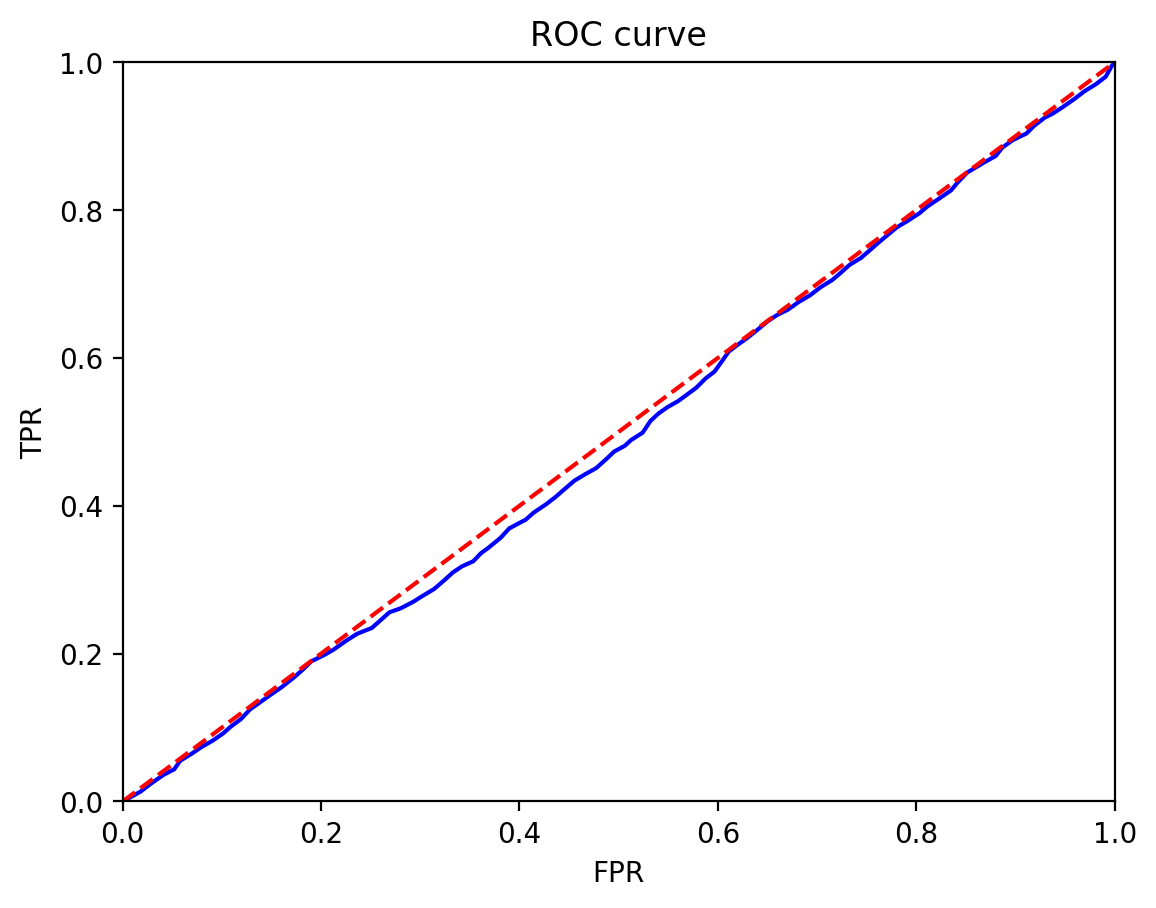

Area Under ROC Curve: 0.489


In [5]:
preds = df['probability']                          # Extract the output of our model from the data
y_test = df['actual_label']                        # Extract the correct label from the data
fpr, tpr, threshold = roc_curve(y_test, preds)     # Using the `roc_curve' function from scikit-learnm calculate the FPRs, TPRs and thresolholds
roc_auc = auc(fpr, tpr)                            # Calculate the AUROC (Area Under ROC Curve)

plt.title('ROC curve')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')                     # Plot a straight line, which indicates random guessing
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()
print("Area Under ROC Curve: %.3f"% roc_auc)

## Conclusion
In summary, the calculated AUROC value of 0.493 provides a crucial measure of the classification model's performance in distinguishing between positive and negative instances. An AUROC value of 0.5 typically corresponds to random guessing, indicating that the model's predictive capability is currently limited and only slightly better than chance. Since our model here scored less than 0.5 we can rightly go back to the drawing board to improve the model's efficiency. Getting an AUROC score of 0.493 also indicates that the work done here to design the ROC curve is accurate since we started our analysis by generating random values to use in illustrating a ROC curve. 

For an optimal AUROC, we generally aim for a value close to 1.0. An AUROC of 1.0 signifies a model that perfectly separates the classes, achieving a complete distinction between true positives and false positives. Achieving a high AUROC indicates strong predictive power and effective classification.

There are some models that require aiming for a perfect AUROC score. For exampleif you are building a model for use in healthcare pedicting illness diagnosis. A very high TPR is thus necessary to always correctly identify sick people. For spam detection, it is the other way around: we don't want important mails to end up in our spam.  
